In [1]:
# importa de librerias necesarias(pandas,pickle,numpy,pathlib,skimage,sklearn,etc.)
import pickle
from pathlib import Path
from skimage import io

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# importa biblioteca keras
import keras

# importa secuencias desde el módulo de modelos keras
from keras.models import Sequential

#importa Dense, Dropout, Flatten, Conv2D, MaxPooling2D desde el módulo de capas de keras
from keras.layers import Dense , Dropout , Flatten , Conv2D , MaxPooling2D

In [2]:
#carga train_label.csv desde la carpeta de conjuntos de datos usando pandas
labels = pd.read_csv('C:/Users/yohel/Desktop/notebook/libro2.csv', index_col=0)

# valor de impresión recuentos por género
print(pd.value_counts(labels.genus))

# asigna los valores de etiqueta de género a y
y = np.array(labels['genus'])

1.0    826
0.0    826
Name: genus, dtype: int64


Example image has shape: {} (200, 200, 3)
RGB values for the top left pixel are: [139 139 147]


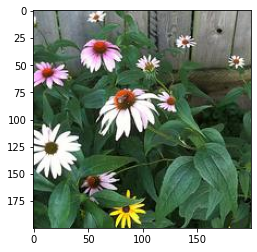

In [3]:
#Cargar una imagen y explorar
example_image = io.imread('C:/Users/yohel/Desktop/notebook/train/{}.jpg'.format(labels.index[0]))
 
#Muestra imagen
plt.imshow(example_image)

# forma de impresión
print('Example image has shape: {}', example_image.shape)
                    
# imprimir valores de canal de color para el píxel superior izquierdo
print('RGB values for the top left pixel are:',example_image[0,0,:])

In [4]:

# Inicializar el escalador estándar"StandardScaler()"
ss = StandardScaler()
c=0
image_list = []
for i in labels.index:
    
    # Carga imagen
    img = io.imread('C:/Users/yohel/Desktop/notebook/train/{}.jpg'.format(i)).astype(np.float64)
    
    # Para cada canal, aplica el método fit_transform del escalador estándar"StandardScaler()"
    for channel in range(img.shape[2]):
        img[:, :, channel] = ss.fit_transform(img[:, :, channel])
        
    #Añade a la lista de todas las imágenes
    image_list.append(img)
    
#Convierte la lista de imágenes en una matriz
X = np.array(image_list)

#Forma de impresión de X
print(X.shape)

(1652, 200, 200, 3)


In [5]:
#Divide conjuntos de evaluación (x_eval e y_eval)
x_interim, x_eval, y_interim, y_eval = train_test_split(X,
                                           y,
                                           test_size=0.2,
                                           random_state=52)

#Divide los datos restantes en trenes y conjuntos de prueba
x_train , x_test , y_train , y_test = train_test_split(x_interim,
                                           y_interim,
                                           test_size=0.4,
                                           random_state=52)

#Examina el número de muestras en los conjuntos de tren, prueba y validación
print('x_train shape:', x_train.shape)
print(len(x_train), 'train samples')
print(x_test.shape[0], 'test samples')
print(x_eval.shape[0], 'eval samples')

x_train shape: (792, 200, 200, 3)
792 train samples
529 test samples
331 eval samples


In [6]:
#Establece constantes del modelo
num_classes = 1

#Define model como secuencial
model = Sequential()

#Primera capa convolucional con 32 filtros
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)))

#Agrega una segunda capa convolucional 2D con 64 filtros
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))

#Reduce la dimensionalidad a través de la agrupación máxima
model.add(MaxPooling2D(pool_size=(2,2)))

#Tercera capa convolucional con 64 filtros
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

#Agrega deserción para evitar un ajuste excesivo
model.add(Dropout(0.25))

#Paso de aplanar necesario, que precede a la capa densa
model.add(Flatten())


#Capa completamente conectada
model.add(Dense(128, activation='relu'))

#Agrega una deserción adicional para evitar el sobreajuste
model.add(Dropout(0.5))

#Capas de predicción
model.add(Dense(num_classes, activation='sigmoid', name='preds'))

# mostrar resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
dropout (Dropout)            (None, 96, 96, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 589824)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               7

In [7]:
model.compile(
    #Establece la pérdida como binary_crossentropy
    loss=keras.losses.binary_crossentropy,
    #Establece el optimizador como descenso de gradiente estocástico
    optimizer=keras.optimizers.SGD(lr=0.001),
    #Establece la métrica como precisión
    metrics=['accuracy']
)
#Simula el entrenamiento del modelo usando las primeras diez observaciones del train"entrenamiento" y los conjuntos de prueba
history=model.fit(
    x_train[:10, :, :, :],
    y_train[:10],
    epochs=5,
    verbose=1,
    validation_data=(x_test[:10, :, :, :], y_test[:10])
)


Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 0.7786 - accuracy: 0.2000 - val_loss: 0.7550 - val_accuracy: 0.3000
Epoch 2/5
1/1 [==============================] - 0s 362ms/step - loss: 0.5275 - accuracy: 0.8000 - val_loss: 0.5861 - val_accuracy: 0.8000
Epoch 3/5
1/1 [==============================] - 0s 341ms/step - loss: 0.3662 - accuracy: 1.0000 - val_loss: 0.7168 - val_accuracy: 0.4000
Epoch 4/5
1/1 [==============================] - 0s 416ms/step - loss: 0.4349 - accuracy: 0.8000 - val_loss: 0.6099 - val_accuracy: 0.8000
Epoch 5/5
1/1 [==============================] - 0s 351ms/step - loss: 0.5592 - accuracy: 0.8000 - val_loss: 0.9093 - val_accuracy: 0.3000


In [8]:
#Carga model preentrenado
from keras.models import load_model
#pretrained_cnn = load_model('C:/Users/yohel/Desktop/notebook/pretrained_model.h5')

#Evalua el modelo en el equipo de prueba
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("")

#Evalua el modelo en un conjunto de reserva
eval_score = model.evaluate(x_eval,y_eval,verbose=0)

#Puntuación de pérdida de impresión
print('Eval loss:', eval_score[0])

#Puntuación de precisión de impresión
print('Eval accuracy:', eval_score[1])

Test loss: 0.729219377040863
Test accuracy: 0.5349716544151306

Eval loss: 0.7144869565963745
Eval accuracy: 0.5287008881568909


Text(0.5, 1.0, 'Accuracy evolution')

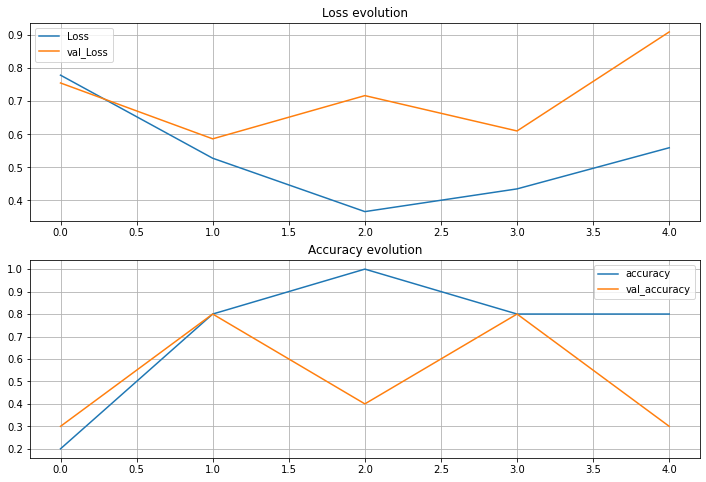

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(211)

#Traza la pérdida de validación
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(212)

#Traza la precisión de la validación
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [10]:
#Probabilidad predichas para x_eval
y_proba=model.predict(x_eval[:5])
print("First five probabilities:")
print(y_proba[:5])
print("")


#Clases previstas para x_eval
y_pred=model.predict_classes(x_eval[:5])
print("First five class predictions:")
print(y_pred[:5])
print("")

First five probabilities:
[[0.6602119 ]
 [0.66048574]
 [0.65074825]
 [0.6237546 ]
 [0.6827124 ]]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
First five class predictions:
[[1]
 [1]
 [1]
 [1]
 [1]]

